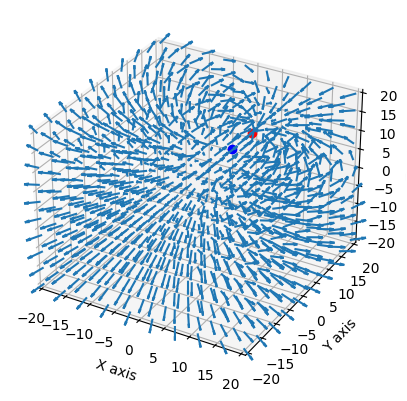

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the ChargedParticle class
class ChargedParticle:
    def __init__(self, chrg: float, pos: list) -> None:
        self.charge = chrg
        if len(pos) != 3:
            raise ValueError("Position must have three components.")
        self.pos = pos  

# Constants
K_c = 8.99e9

# Create charged particles
c1 = ChargedParticle(2.0, [3, 6, 8])
c2 = ChargedParticle(-2.0, [6, 8, 12])

chrg_lst = [c1, c2]

# Grid for x, y, z points
x, y, z = np.meshgrid(np.linspace(-20, 20, 10),
                      np.linspace(-20, 20, 10),
                      np.linspace(-20, 20, 10))

# Initialize vector component
u, v, w = 0, 0, 0

for particle in chrg_lst:
    r = [x - particle.pos[0], y - particle.pos[1], z - particle.pos[2]]
    mag_r = np.sqrt(r[0]**2+r[1]**2+r[2]**2)
    
    # Prevent division by zero by adding a small value to mag_r
    
    mag_r[mag_r == 0] = 1*(10**-20)
    
    r_hat = r / mag_r
    E = K_c * particle.charge / mag_r**2
    u += E * r_hat[0]
    v += E * r_hat[1]
    w += E * r_hat[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.quiver(x, y, z, u, v, w, length=3, normalize=True)

ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])
ax.set_zlim([-20, 20])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.plot(c1.pos[0],c1.pos[1],c1.pos[2], 'bo') #charge 1 blue
ax.plot(c2.pos[0],c2.pos[1],c2.pos[2], 'ro') #charge 2 red
plt.show()



